In [47]:
import pandas as pd
import re
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
 



In [48]:
df=pd.read_csv("C:\\Users\\vova\\downloads\\autos_imports-85.csv")
#data = pd.read_csv('file1.csv', error_bad_lines=False, header=None)
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")


In [49]:
df.head()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('mode.sim_interactive', True)
pd.set_option('display.max_columns', None)

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [52]:
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])

In [53]:
df_melt.head()

,index,variable,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29


In [55]:
df_melt.columns = ['index', 'treatments', 'value']

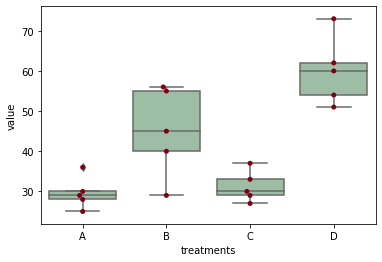

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [59]:
df_melt.shape 
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print(fvalue, pvalue)

(20, 3)

17.492810457516338 2.639241146210922e-05


In [58]:
df_melt.describe(include='all')

,index,treatments,value
count,20.000000,20,20.000000
unique,NaN,4,NaN
top,NaN,D,NaN
freq,NaN,5,NaN
mean,2.000000,NaN,41.450000
std,1.450953,NaN,14.380085
min,0.000000,NaN,25.000000
25%,1.000000,NaN,29.000000
50%,2.000000,NaN,36.500000
75%,3.000000,NaN,54.250000


In [8]:
df = df.sort_index(ascending=False)

In [9]:
df.head()

%symboling normalized-losses   make fuel-type   aspiration num-of-doors  \
3 ?  alfa-romero               gas    std       two  convertible          rwd   
  ?  alfa-romero               gas    std       two  convertible          rwd   
  ?   mitsubishi               gas  turbo       two    hatchback          fwd   
  ?   mitsubishi               gas  turbo       two    hatchback          fwd   
  ?   mitsubishi               gas  turbo       two    hatchback          fwd   

    body-style  drive-wheels  wheel-base  length  width  height curb-weight  \
3 ?      front          88.6       168.8    64.1   48.8    2548        dohc   
  ?      front          88.6       168.8    64.1   48.8    2548        dohc   
  ?      front          95.9       173.2    66.3   50.2    2833         ohc   
  ?      front          95.9       173.2    66.3   50.2    2921         ohc   
  ?      front          95.9       173.2    66.3   50.2    2926         ohc   

    engine-type  num-of-cylinders engine-size fuel-system  bore  stroke  \
3 ?        four               130        mpfi        3.47  2.68     9.0   
  ?        four               130        mpfi        3.47  2.68     9.0   
  ?        four               156        spdi        3.58  3.86     7.0   
  ?        four               156        spdi        3.59  3.86     7.0   
  ?        four               156        spdi        3.59  3.86     7.0   

    compression-ratio horsepower-peak-rpm  city-mpg  highway-mpg  price  
3 ?               111                5000        21           27  13495  
  ?               111                5000        21           27  16500  
  ?               145                5000        19           24  12629  
  ?               145                5000        19           24  14869  
  ?               145                5000        19           24  14489

In [11]:
subset=df[['length','height']]

In [12]:
subset.head()

length  height
3 ?    64.1    2548
  ?    64.1    2548
  ?    66.3    2833
  ?    66.3    2921
  ?    66.3    2926

In [17]:
check_for_nan=subset.isnull().sum()
print (check_for_nan)

length    0
height    0
dtype: int64


In [16]:
subset.isnull().values.any()

False